In [1]:
# Install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the employee data
from google.colab import files
uploaded = files.upload()


Saving Attrition data.csv to Attrition data.csv


In [3]:
employee_data = pd.read_csv("Attrition data.csv")


In [4]:
# Handling missing values by dropping rows with missing data
employee_data.dropna(inplace=True)


In [5]:
print(employee_data.columns)


Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')


In [6]:
print(employee_data.head())


   EmployeeID  Age  Attrition     BusinessTravel              Department  \
0           1   51          0      Travel_Rarely                   Sales   
1           2   31          1  Travel_Frequently  Research & Development   
2           3   32          0  Travel_Frequently  Research & Development   
3           4   38          0         Non-Travel  Research & Development   
4           5   32          0      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  ...  \
0                 6          2  Life Sciences              1  Female  ...   
1                10          1  Life Sciences              1  Female  ...   
2                17          4          Other              1    Male  ...   
3                 2          5  Life Sciences              1    Male  ...   
4                10          1        Medical              1    Male  ...   

   TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0                1.

In [7]:
# Creating a new feature for employee satisfaction
employee_data['satisfaction'] = employee_data['JobSatisfaction'].apply(lambda x: 'Satisfied' if x >= 3 else 'Not Satisfied')


In [8]:
# Building a random forest classifier to predict attrition
X = employee_data.drop(['Attrition'], axis=1)
y = employee_data['Attrition']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


X_train_encoded.dropna(inplace=True)
X_test_encoded.dropna(inplace=True)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [ ]:
# Model Evaluation
X_test_encoded = pd.get_dummies(X_test)

missing_columns = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for column in missing_columns:
    X_test_encoded[column] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]


y_pred = rf_classifier.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9930232558139535
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       717
           1       1.00      0.96      0.98       143

    accuracy                           0.99       860
   macro avg       1.00      0.98      0.99       860
weighted avg       0.99      0.99      0.99       860



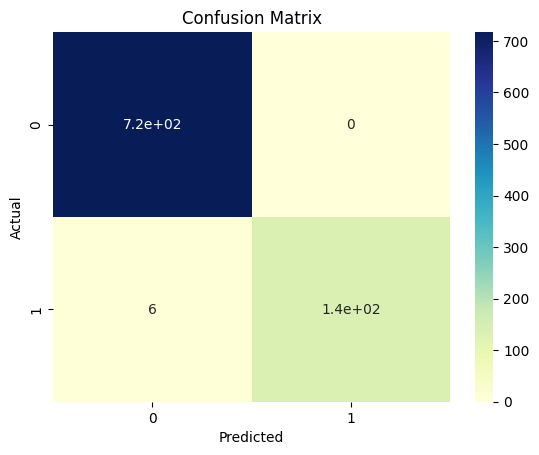

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

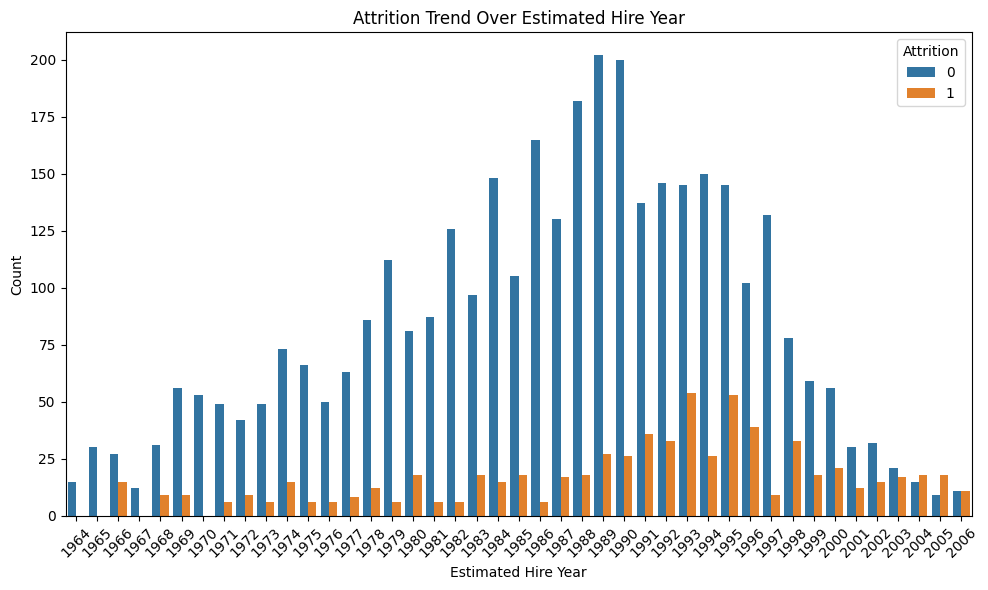

In [ ]:
# Attrition trend over Estimated Hire Year
plt.figure(figsize=(10, 6))

current_year = pd.Timestamp.now().year
employee_data['estimated_hire_year'] = current_year - employee_data['Age']

sns.countplot(x='estimated_hire_year', hue='Attrition', data=employee_data)
plt.title('Attrition Trend Over Estimated Hire Year')
plt.xlabel('Estimated Hire Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

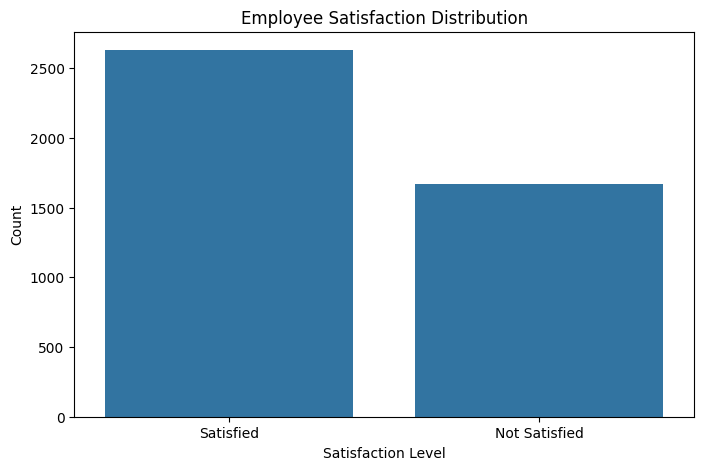

In [ ]:
# Distribution of satisfaction levels among employees
plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction', data=employee_data)
plt.title('Employee Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


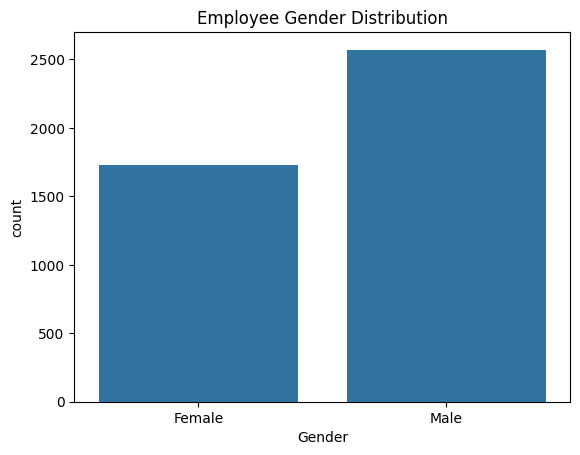

In [ ]:
#Campare Attrition by Gender
sns.countplot(x='Gender', data=employee_data)
plt.title('Employee Gender Distribution')
plt.show()

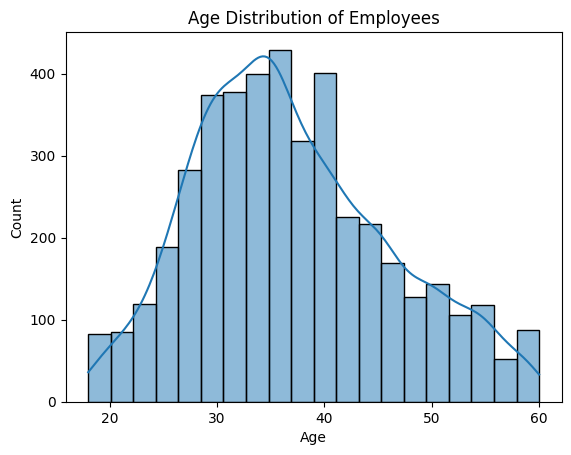

In [ ]:
#Comaparing Age Distribution of Employees
sns.histplot(x='Age', data=employee_data, bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.show()

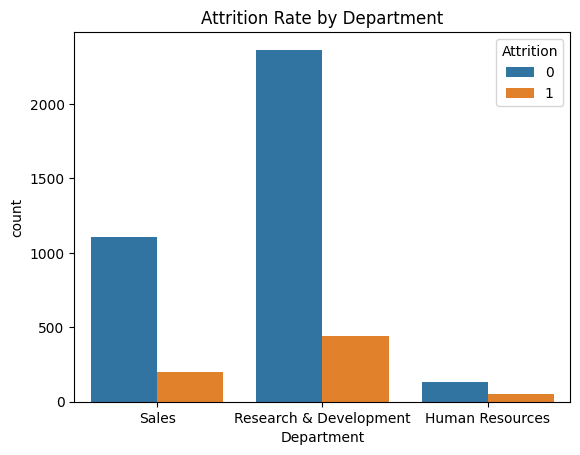

In [ ]:
#Compare Attrition Rate by Department
sns.countplot(x='Department', hue='Attrition', data=employee_data)
plt.title('Attrition Rate by Department')
plt.show()


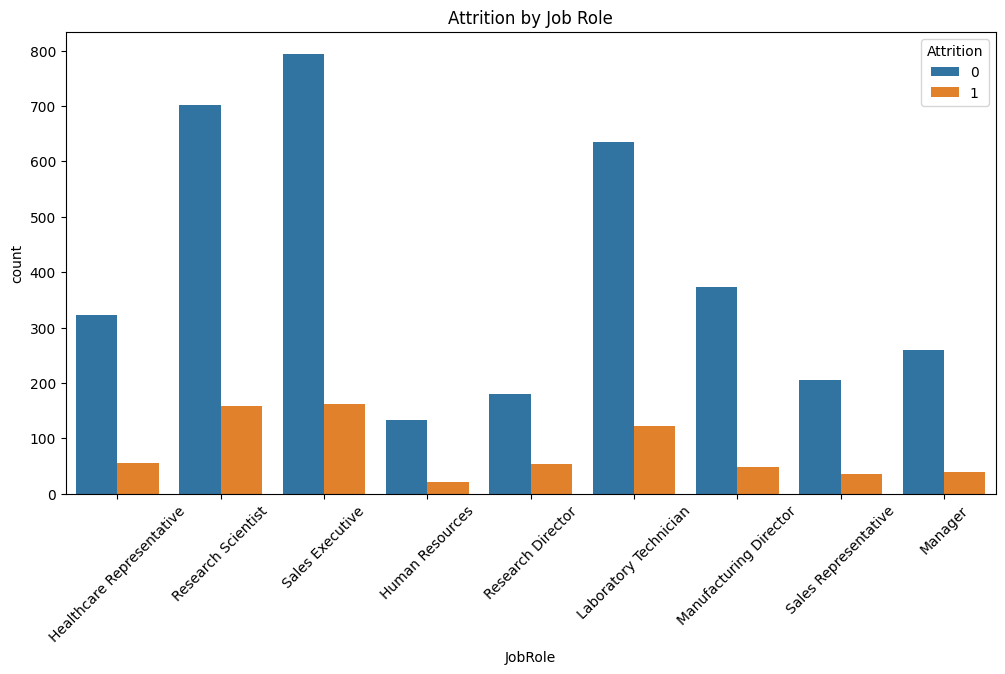

In [ ]:
#Compare Attrition by Job Role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=employee_data)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

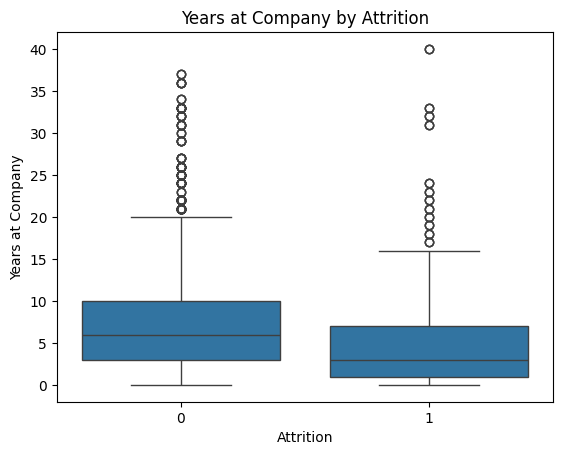

In [ ]:
#Compare YearsAtCompany by Attrition
sns.boxplot(x='Attrition', y='YearsAtCompany', data=employee_data)
plt.title('Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()